02 Visualize distribution sex
===
Visualizes the distribution of respondents to a particular question and country using violine plots. The violine plots are split into Female/Male.
Additionally, an above plotted mean line visualizes the trend of both asked sexes.

1. All countrie, all waves, all questions
2. One countrie, all waves, one question + mean line plot

In [1]:
#Library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
#load data
dfWVS = pd.read_csv('..//data//WVS_cleaned_10.csv')
#define variables
list3Countries=['Germany','China','Turkey']
list5Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Turkey','Nigeria','Peru','Iran','United States','Serbia','South Africa','Pakistan']
listGenderQuestions=['job', 'politician', 'university', 'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control']
listDemographicQuestions=['sex', 'age', 'ethnic', 'status', 'top_earner', 'town_size']
listIDColummns=['wave', 'wave_years', 'country', 'respondent_number', 'year']
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
listYears = ['1994-1998','1999-2004','2005-2009','2010-2014','2017-2022']



# 1. Plot all countrie, all waves, all questions


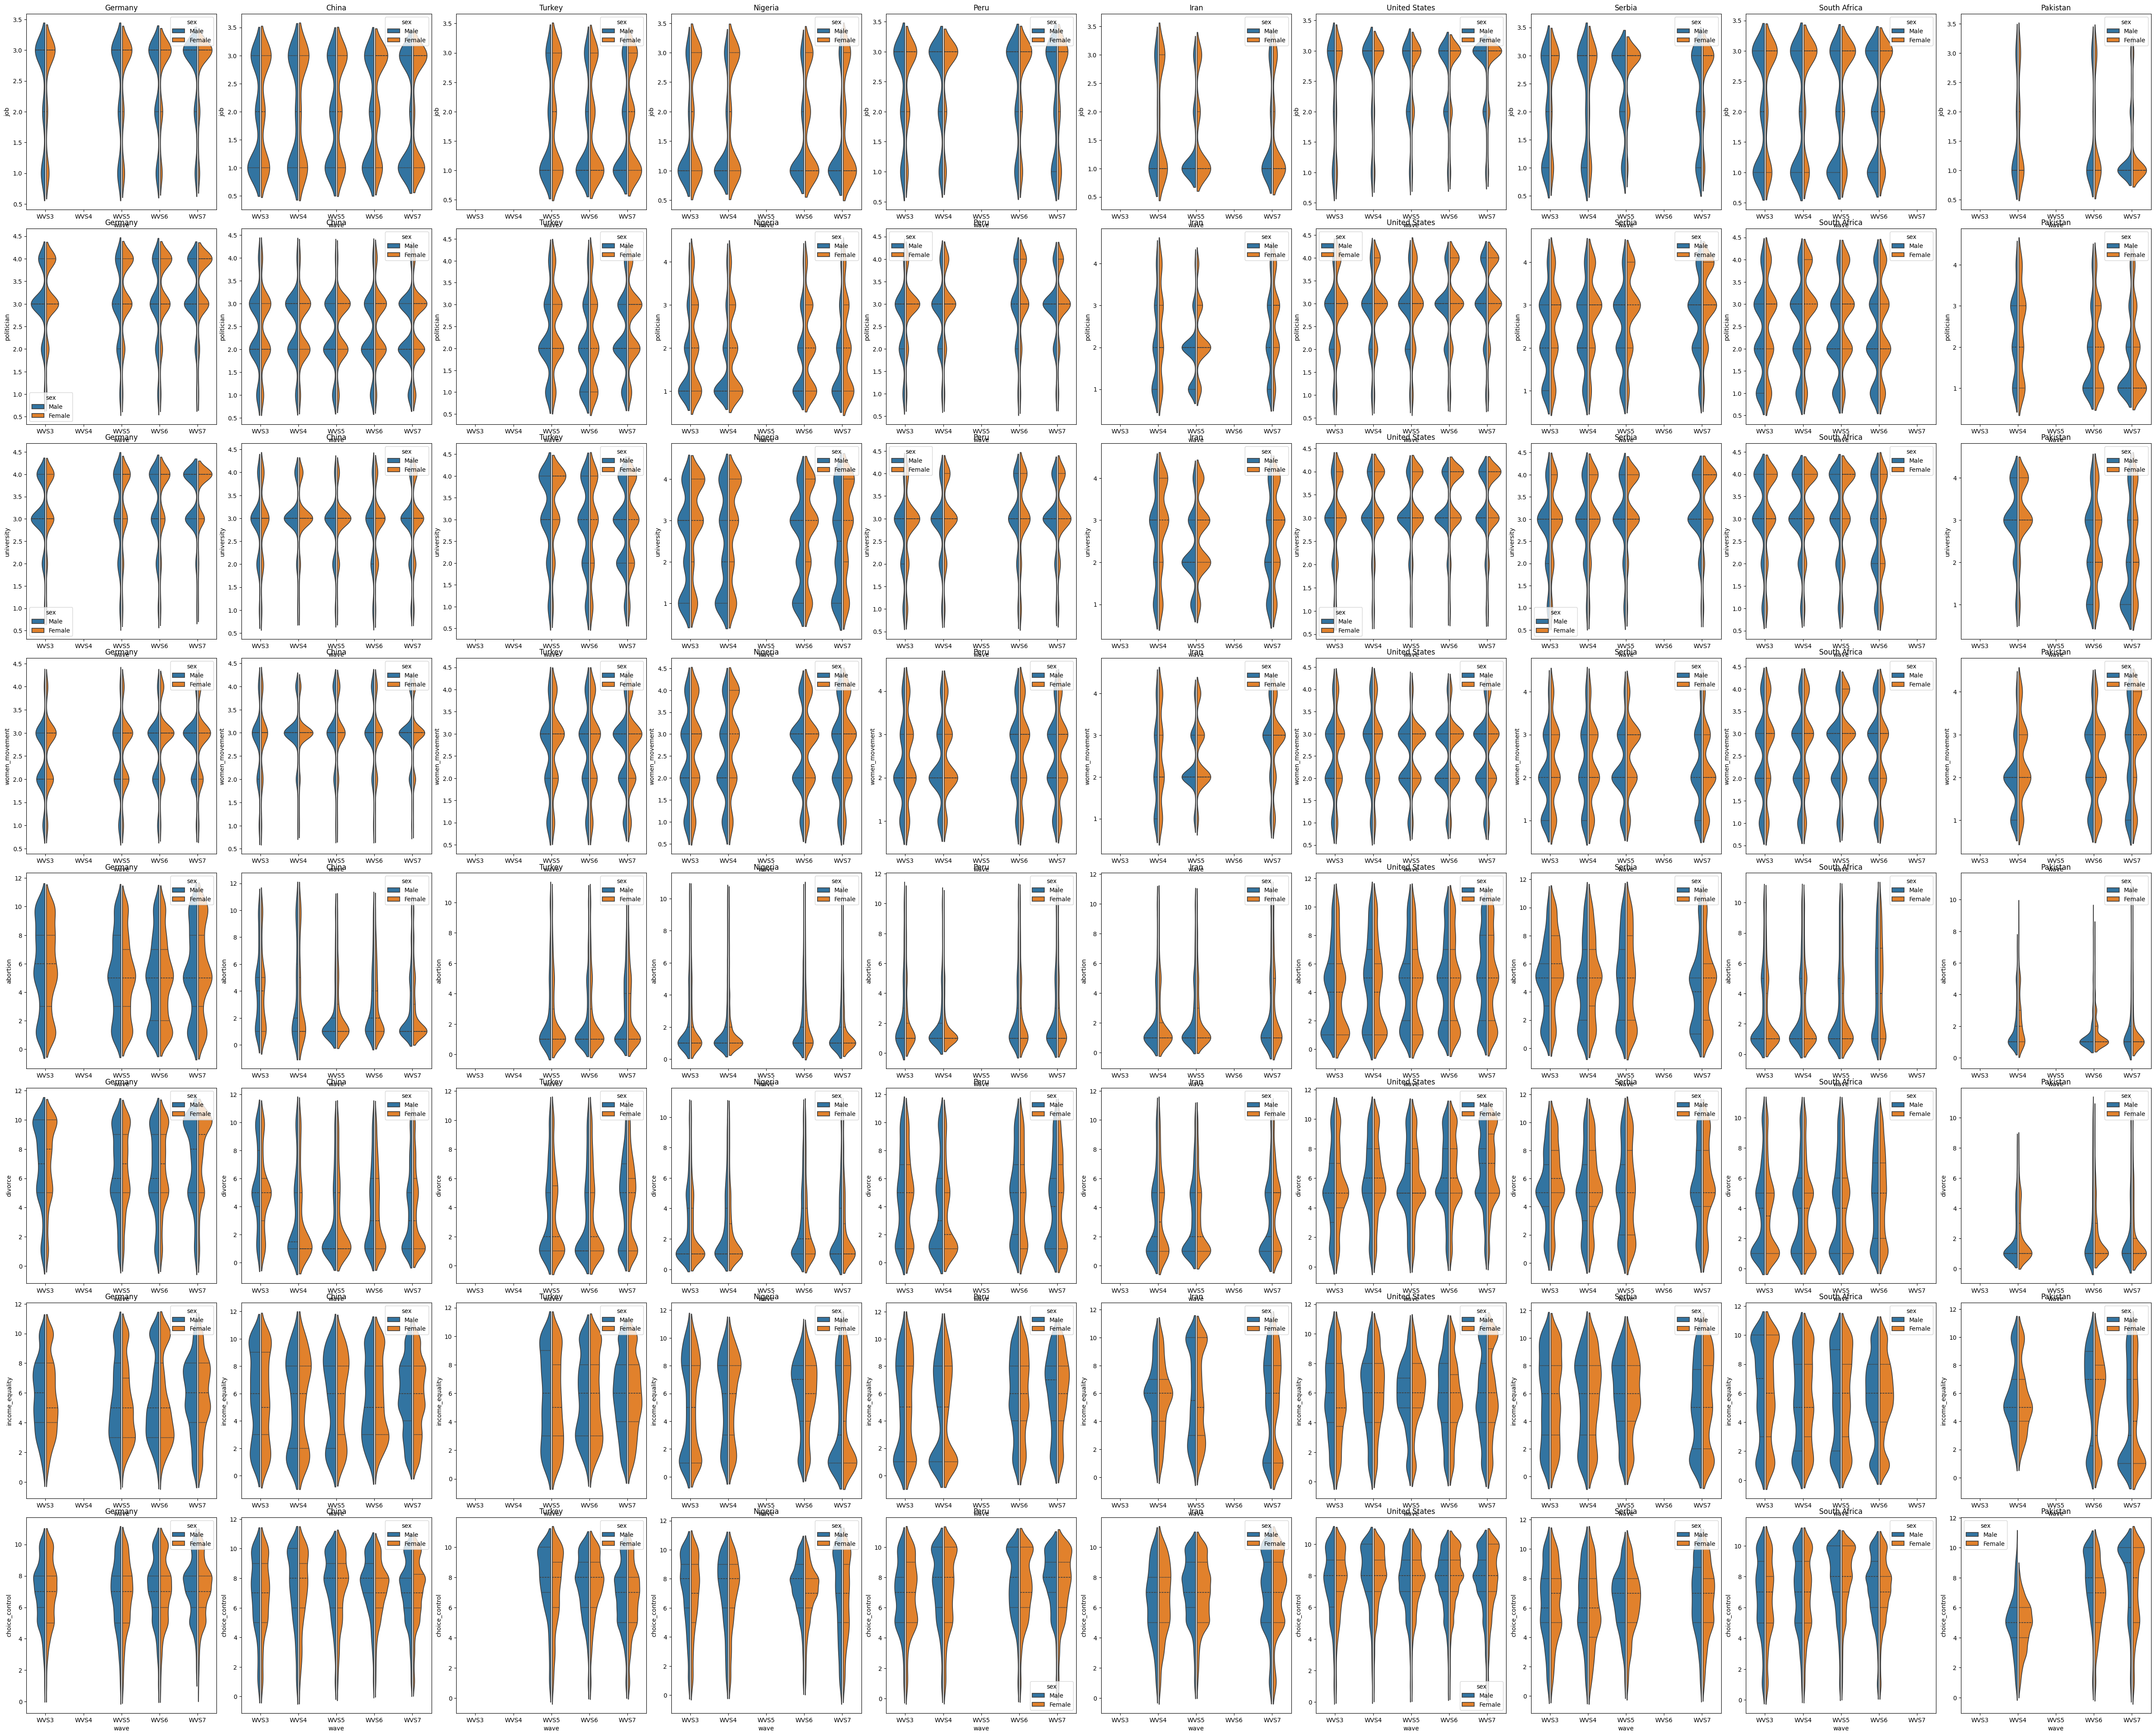

In [2]:
save=False

fig, axs = plt.subplots(nrows=len(listGenderQuestions), ncols=len(listCountries), figsize=(5*len(listCountries), 5*len(listGenderQuestions))) # no "top_earner"
plt.tight_layout()

for idQuestion, question in enumerate(listGenderQuestions):
    for idCountry, country in enumerate(listCountries):         #subset.country.unique()
        violinePlt = sns.violinplot(data=dfWVS[dfWVS.country==country], x="wave", y=question, hue="sex", split=True, gap=.1, 
                       inner="quart", order= listWaves, hue_order=['Male','Female'], ax=axs[idQuestion,idCountry])
        axs[idQuestion,idCountry].set_title(country)
            
plt.show()
if save:
    fig.savefig('..\\plots\\violine\\all.jpg')

2. One countrie, all waves, one question (+ mean line plot)

In [3]:
def get_mean_std(country: str, question: str, sex: str)-> (np.array,np.array):
    data=dfWVS[dfWVS.country==country]
    y1 = data[(data["wave"]=="WVS3") & (data["sex"]==sex)][question].values
    y2 = data[(data["wave"]=="WVS4") & (data["sex"]==sex)][question].values
    y3 = data[(data["wave"]=="WVS5") & (data["sex"]==sex)][question].values
    y4 = data[(data["wave"]=="WVS6") & (data["sex"]==sex)][question].values
    y5 = data[(data["wave"]=="WVS7") & (data["sex"]==sex)][question].values

    mean = [np.mean(y1), np.mean(y2), np.mean(y3), np.mean(y4), np.mean(y5)]
    std = [np.std(y1), np.std(y2), np.std(y3), np.std(y4), np.std(y5)]
    return mean, std

def plot_violine(country: str, question: str, save:bool=True):
    sns.violinplot(data=dfWVS[dfWVS.country==country], x="wave_years", y=question, hue="sex", split=True, gap=.1, 
                       inner="quart", order= listYears, hue_order=['Male','Female'])
    x = [0, 1, 2, 3, 4]
    meanMale, errorMale = get_mean_std(country, question, "Male")
    plt.errorbar(x, meanMale, yerr=errorMale, fmt='-o')
    meanMale, errorMale = get_mean_std(country, question, "Female")
    plt.errorbar(x, meanMale, yerr=errorMale, fmt='-o')
    if save:
        plt.savefig('..\\plots\\violine\\'+ country + '_' + question + '.jpg')
    pass

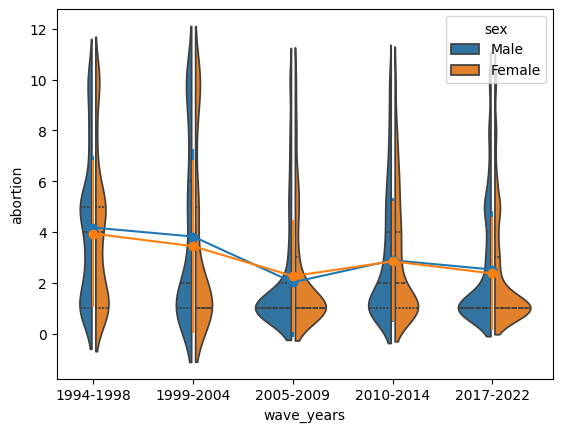

In [4]:
country='China'
question='abortion'
plot_violine(country, question, False)